In [1]:
import pygame
import json
import bach
from bach.inference import transformer_inference
import time
import matplotlib.pyplot as plt


pygame 2.6.1 (SDL 2.28.4, Python 3.12.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Download Dataset

In [4]:
! python -m bach data load


Downloaded 4796 MIDI files successfully
File paths were saved to D:\Dev\repo\bach\data_cache\midi_files.json


In [2]:
def play_midi(file_path):
    pygame.mixer.init()
    # Load the MIDI file
    pygame.mixer.music.load(file_path)
    # Play the MIDI file
    pygame.mixer.music.play()
    while pygame.mixer.music.get_busy():
        time.sleep(1)  # Wait 1 second between checks

In [3]:
def plot_midi(data):
    # Initialize data storage
    colors = plt.colormaps['tab10']  # Colormap for different instruments
    instrument_data = {}

    # Iterate over instruments and collect their notes' data
    for idx, instrument in enumerate(data.instruments):
        instrument_name = instrument.name if instrument.name else f"Instrument {idx + 1}"
        pitches = [note.pitch for note in instrument.notes]
        start_times = [note.start for note in instrument.notes]
        instrument_data[instrument_name] = (pitches, start_times, colors(idx % 10))  # Assign color based on index

    # Create the scatter plot
    plt.figure(figsize=(12, 8))
    for name, (pitches, start_times, color) in instrument_data.items():
        plt.scatter(start_times, pitches, label=name, color=color, alpha=0.7)

    # Add title and labels
    plt.title('Pitch vs Time for Different Instruments')
    plt.xlabel('Start Time (s)')
    plt.ylabel('Pitch')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend outside the plot
    plt.tight_layout()
    plt.show()

In [4]:
data_cache_dir = bach.ROOT_DIR.parent / "data_cache"

all_midi_files = json.loads((data_cache_dir / "midi_files.json").read_text())

In [5]:
selected_midi_file = data_cache_dir / "data" /"vaughan-slow_dance.mid"

In [6]:
generated_midis = transformer_inference(
    str(selected_midi_file.absolute()),
    temperatures = [0.1, 0.7, 1],
    input_seq_length= 100,
    max_output_seq_length = 200,
)

Running inference on cuda


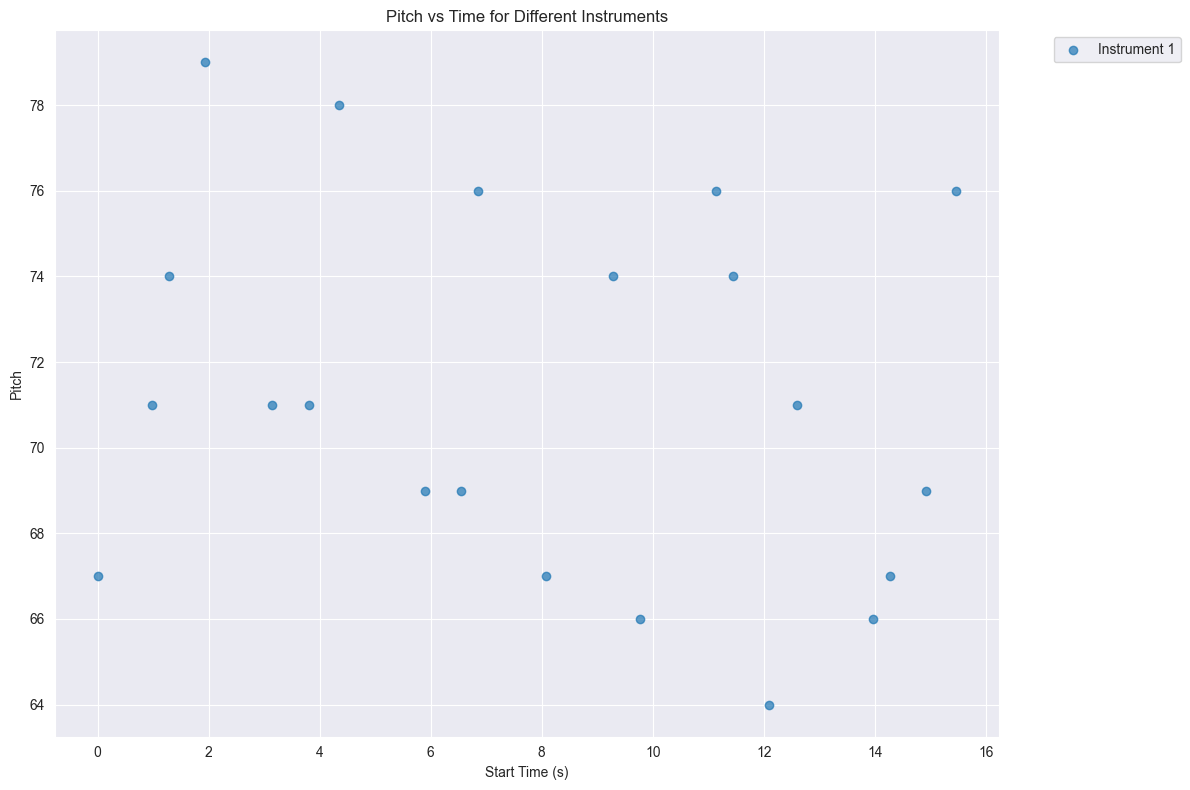

Generated MIDI file with label (input) saved at D:\Dev\repo\bach\data_cache\generated_music\input.mid


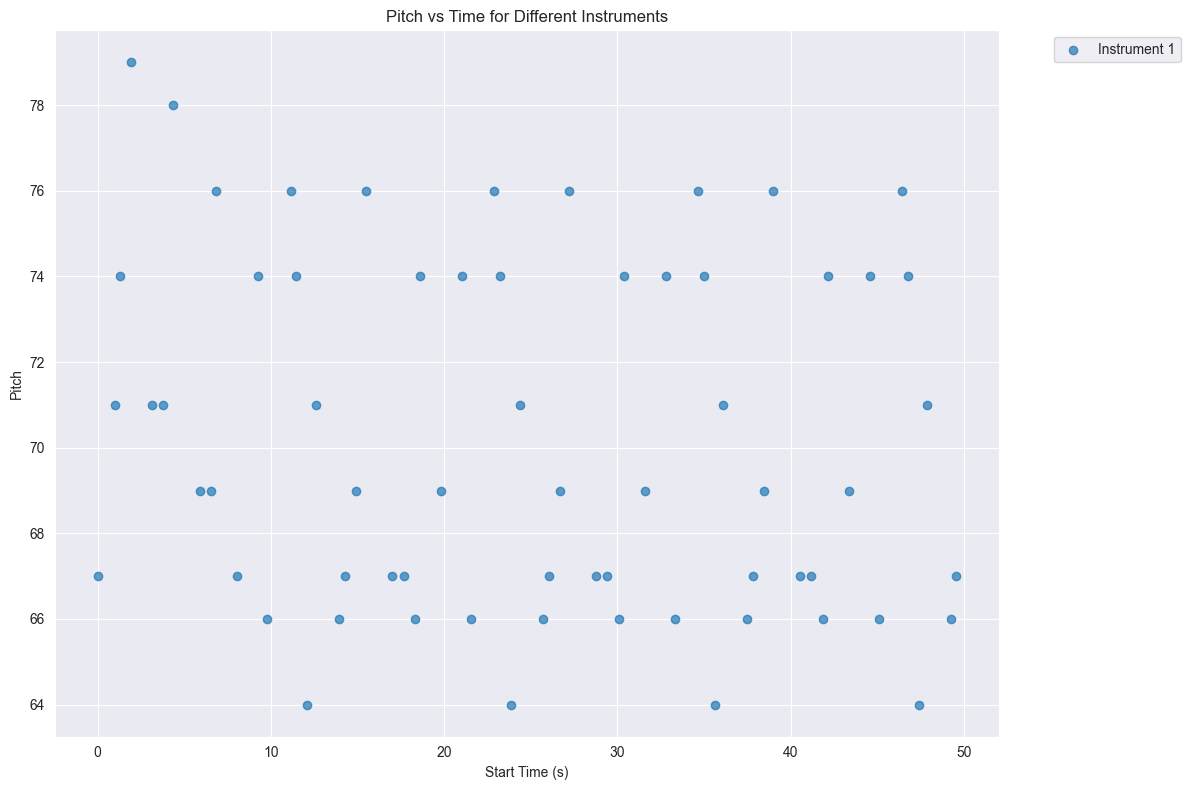

Generated MIDI file with label (temperature-0.1) saved at D:\Dev\repo\bach\data_cache\generated_music\temperature-0.1.mid


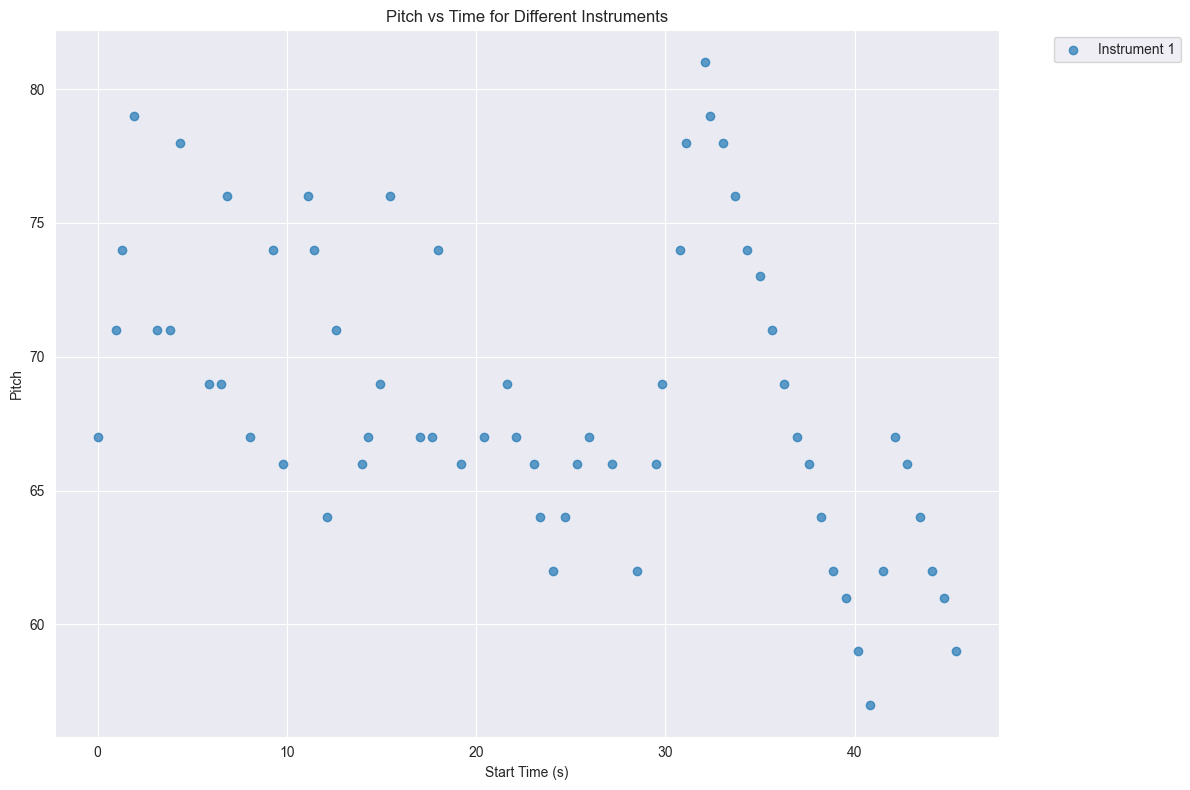

Generated MIDI file with label (temperature-0.7) saved at D:\Dev\repo\bach\data_cache\generated_music\temperature-0.7.mid


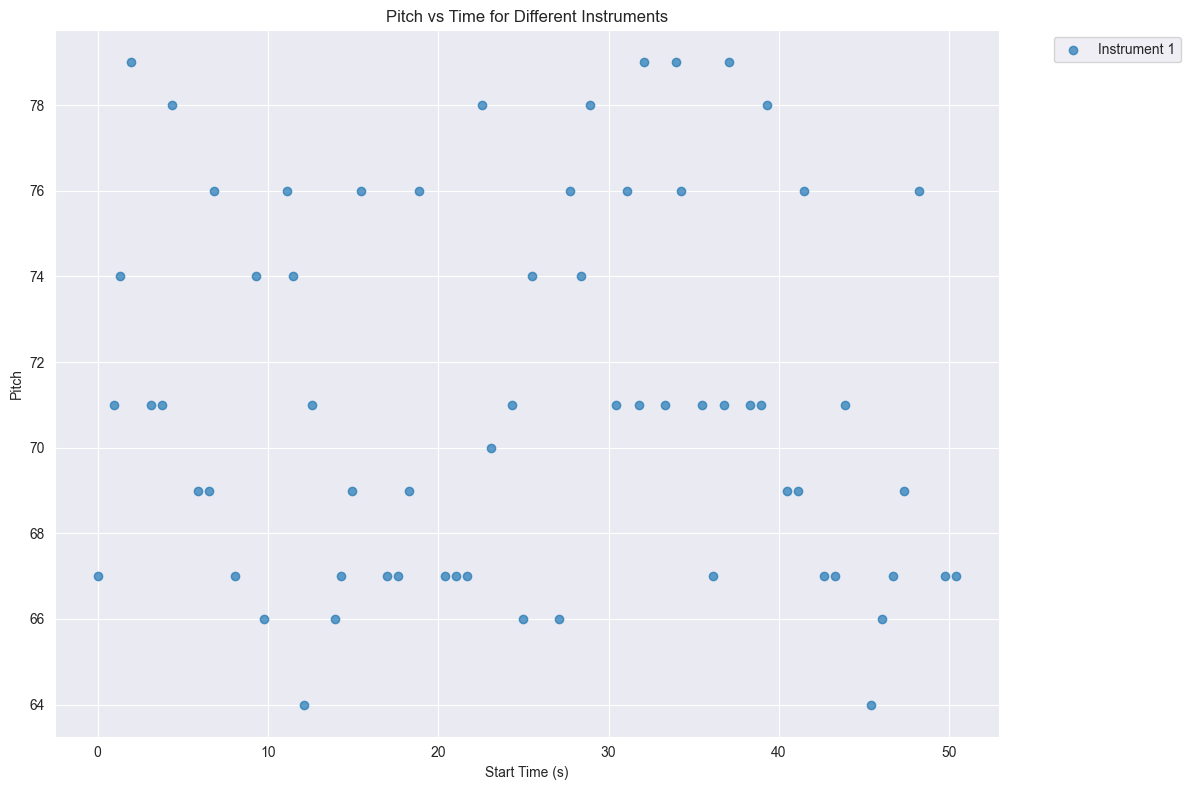

Generated MIDI file with label (temperature-1) saved at D:\Dev\repo\bach\data_cache\generated_music\temperature-1.mid


In [7]:
generated_music_folder = data_cache_dir / "generated_music"
generated_music_folder.mkdir(exist_ok=True, parents=True)

for label, midi_data in generated_midis.items():
    file_path = generated_music_folder / f"{label}.mid"
    midi_data.write(str(file_path.absolute()))
    plot_midi(midi_data)
    print(f"Generated MIDI file with label ({label}) saved at {file_path}")
